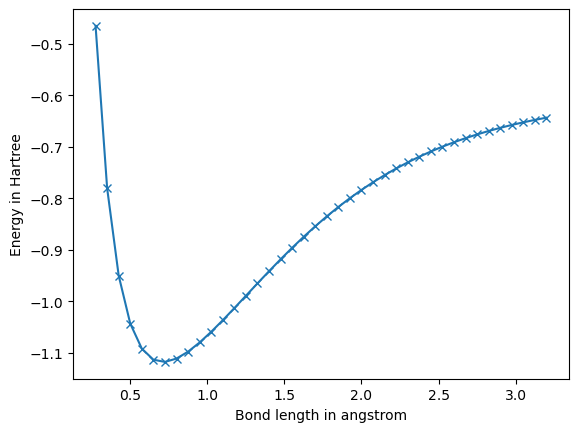

In [5]:
from openfermion.chem import MolecularData
from openfermionpyscf import run_pyscf

# Set molecule parameters.
basis = 'sto-3g'
multiplicity = 1
n_points = 40
bond_length_interval = 3.0 / n_points
# Set calculation parameters.
run_scf = 1
# Generate molecule at different bond lengths.
hf_energies = []
bond_lengths = []
for point in range(1, n_points + 1):
    bond_length = bond_length_interval * float(point) + 0.2
    bond_lengths += [bond_length]
    geometry = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    molecule = MolecularData(
        geometry, basis, multiplicity,
        description=str(round(bond_length, 2)))
    
    # Run pyscf.
    molecule = run_pyscf(molecule,run_scf=1)
    hf_energies += [molecule.hf_energy]
# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, hf_energies, 'x-')
plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.show()

In [2]:
geometry = [('H', (0., 0., 0.)), ('H', (0., 0., 0.7))]
molecule = MolecularData(geometry, 'sto-3g', 1)
# Run pyscf.
mf = run_pyscf(molecule,run_scf=1)


In [3]:
mf.one_body_integrals

array([[-1.27785301e+00, -2.55319765e-16],
       [-4.83819919e-17, -4.48299696e-01]])

In [4]:
mf.get_molecular_hamiltonian()

() 0.7559674441714287
((0, 1), (0, 0)) -1.2778530061568754
((1, 1), (1, 0)) -1.2778530061568754
((2, 1), (2, 0)) -0.44829969610163756
((3, 1), (3, 0)) -0.44829969610163756
((0, 1), (0, 1), (0, 0), (0, 0)) 0.34119476657602105
((0, 1), (0, 1), (2, 0), (2, 0)) 0.08950028803070328
((0, 1), (1, 1), (1, 0), (0, 0)) 0.34119476657602105
((0, 1), (1, 1), (3, 0), (2, 0)) 0.08950028803070328
((0, 1), (2, 1), (0, 0), (2, 0)) 0.08950028803070328
((0, 1), (2, 1), (2, 0), (0, 0)) 0.33536638915437933
((0, 1), (3, 1), (1, 0), (2, 0)) 0.08950028803070328
((0, 1), (3, 1), (3, 0), (0, 0)) 0.33536638915437933
((1, 1), (0, 1), (0, 0), (1, 0)) 0.34119476657602105
((1, 1), (0, 1), (2, 0), (3, 0)) 0.08950028803070328
((1, 1), (1, 1), (1, 0), (1, 0)) 0.34119476657602105
((1, 1), (1, 1), (3, 0), (3, 0)) 0.08950028803070328
((1, 1), (2, 1), (0, 0), (3, 0)) 0.08950028803070328
((1, 1), (2, 1), (2, 0), (1, 0)) 0.33536638915437933
((1, 1), (3, 1), (1, 0), (3, 0)) 0.08950028803070328
((1, 1), (3, 1), (3, 0), (1, 0)) 